In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
# Load Breast Cancer dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)


In [4]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

In [5]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC()

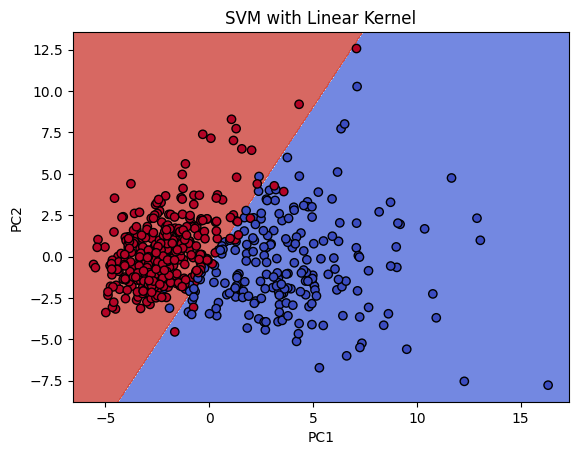

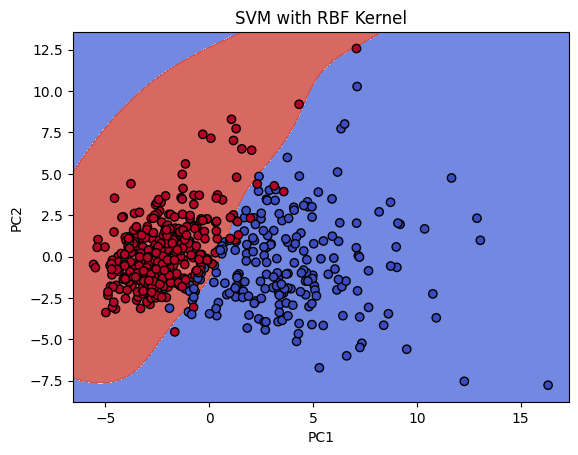

In [6]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # mesh step
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

plot_decision_boundary(svm_linear, X_2D, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_2D, y, "SVM with RBF Kernel")


In [7]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator Score:", grid.best_estimator_.score(X_test, y_test))


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator Score: 0.9736842105263158


In [8]:
cv_scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.9789318428815401


In [9]:
y_pred = grid.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[40  3]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

